In [3]:
pwd

'/content/drive/MyDrive/tesr/AI-/코드'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/tesr/AI-/코드

/content/drive/MyDrive/tesr/AI-/코드


In [4]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import shutil

In [5]:
import tensorflow
import pandas as pd 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import random
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
import keras
from keras import backend as K
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow_datasets as tfds
import glob
print(os.listdir("data/train"))

['bikedir', 'road_bike', 'kickboard', 'motor_cycle', 'bicycle', 'mountain_bike', 'traindir']


In [48]:
base_dir = 'data/train'
imgb_dir = 'data/train/bicycle'
imgk_dir = 'data/train/kickboard'
imgm_dir = 'data/train/motor_cycle'
test_dir='data/test'
bikem_dir='data/train/mountain_bike'
biker_dir='data/train/road_bike'

In [49]:
trans = transforms.Compose([#transforms.Resize((256,256)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root="data/train", transform=trans)

In [50]:
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [51]:
trainset.__getitem__(18)

(tensor([[[-0.0980, -0.1059, -0.1137,  ..., -0.1686, -0.1373, -0.1373],
          [-0.0980, -0.1059, -0.1216,  ..., -0.1765, -0.1294, -0.1294],
          [-0.1059, -0.1137, -0.1294,  ..., -0.1922, -0.1686, -0.1686],
          ...,
          [ 0.0902,  0.1216,  0.0275,  ..., -0.0745, -0.0118, -0.0118],
          [ 0.1608,  0.1608, -0.0588,  ..., -0.0510, -0.0118, -0.0118],
          [ 0.2000,  0.2000, -0.0824,  ..., -0.0431, -0.0039, -0.0039]],
 
         [[ 0.1529,  0.1451,  0.1373,  ..., -0.0745, -0.0431, -0.0431],
          [ 0.1529,  0.1451,  0.1294,  ..., -0.0824, -0.0353, -0.0353],
          [ 0.1451,  0.1373,  0.1216,  ..., -0.0980, -0.0745, -0.0745],
          ...,
          [ 0.3412,  0.3569,  0.2627,  ...,  0.1922,  0.2549,  0.2549],
          [ 0.4118,  0.3961,  0.1765,  ...,  0.2157,  0.2549,  0.2549],
          [ 0.4510,  0.4353,  0.1529,  ...,  0.2235,  0.2627,  0.2627]],
 
         [[ 0.3490,  0.3412,  0.3333,  ...,  0.0196,  0.0510,  0.0510],
          [ 0.3490,  0.3412,

In [52]:
trainloader=DataLoader(trainset,
                      shuffle=False,
                      num_workers =4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [53]:
len(trainset)

2839

In [54]:
classes = trainset.classes
classes

['bicycle',
 'bikedir',
 'kickboard',
 'motor_cycle',
 'mountain_bike',
 'road_bike',
 'traindir']

In [55]:
#bike_dir = os.path.join(base_dir,'bikedir')
# train_dir = os.path.join(base_dir,'traindir')
#os.mkdir(train_dir)

In [56]:
#bicycle_names= os.listdir(imgb_dir)

In [57]:
#kickboard_names = os.listdir(imgk_dir)

In [58]:
#motor_names = os.listdir(imgm_dir)

In [59]:
# test_names = os.listdir(test_dir)

In [60]:
#mountain_names = os.listdir(bikem_dir)

In [61]:
road_names = os.listdir(biker_dir)

In [62]:
# 크롤링된 이미지 0-i까지 순환처리용
# i=449
# for name in road_names:
#     src = os.path.join(biker_dir, name)
#     dst = 'bicycle_'+str(i)+'.jpg'
#     dst = os.path.join(biker_dir, dst)
#     os.rename(src,dst)
#     i += 1

In [63]:
#이미지 복사 및 폴더 이동
# fnames=['bicycle_{}.jpg'.format(i) for i in range(10)]

# for fname in fnames:
#     src = os.path.join(imgb_dir,fname)
#     dst = os.path.join(test_dir,fname)
#     shutil.copyfile(src,dst)

In [64]:
#이미지 복사 및 폴더 이동
# fnames=['motor_{}.jpg'.format(i) for i in range(10)]

# for fname in fnames:
#     src = os.path.join(imgm_dir,fname)
#     dst = os.path.join(test_dir,fname)
#     shutil.copyfile(src,dst)

In [65]:
#이미지 복사 및 폴더 이동
# fnames=['kickboard_{}.jpg'.format(i) for i in range(10)]

# for fname in fnames:
#     src = os.path.join(imgk_dir,fname)
#     dst = os.path.join(test_dir,fname)
#     shutil.copyfile(src,dst)

In [66]:
# os.listdir(bike_dir)

In [67]:
bikes = os.listdir("data/train/traindir")
categories = []
for bike in bikes:
    category = bike.split('_')[0]
    if category == 'bicycle':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': bikes,
    'category': categories
})

In [68]:
df.tail(240)

,filename,category
1075,bicycle_152.jpg,1
1076,bicycle_146.jpg,1
1077,bicycle_17.jpg,1
1078,bicycle_163.jpg,1
1079,bicycle_136.jpg,1
...,...,...
1310,bicycle_387.jpg,1
1311,bicycle_381.jpg,1
1312,bicycle_366.jpg,1
1313,bicycle_389.jpg,1


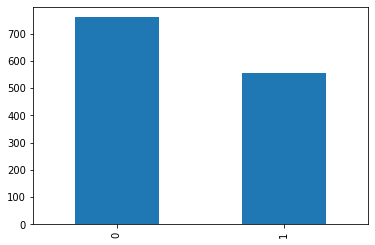

In [69]:
df['category'].value_counts().plot.bar()

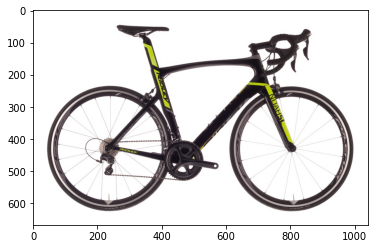

In [70]:
sample = random.choice(bikes)
image = tensorflow.keras.utils.load_img("data/train/traindir/"+sample)
plt.imshow(image)

In [71]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',padding = 'same',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 64)      

In [72]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [73]:
earlystop = EarlyStopping(patience=10)

In [74]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.08,
                                            min_delta=0.01,
                                            cooldown=5,
                                            min_lr=0.000001)

In [75]:
callbacks = [earlystop, learning_rate_reduction]

In [76]:
df["category"] = df["category"].replace({0: 'Not Bike', 1: 'Bike'}) 

In [77]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=50)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

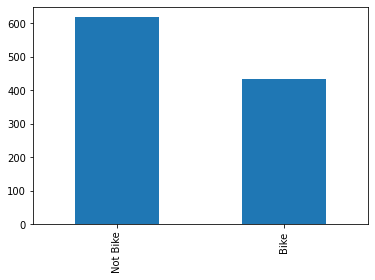

In [78]:
train_df['category'].value_counts().plot.bar()

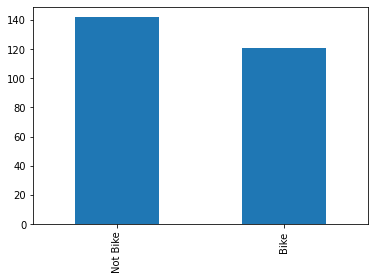

In [79]:
validate_df['category'].value_counts().plot.bar()

In [80]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=30

In [81]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "data/train/traindir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1052 validated image filenames belonging to 2 classes.


In [82]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "data/train/traindir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 263 validated image filenames belonging to 2 classes.


In [83]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "data/train/traindir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


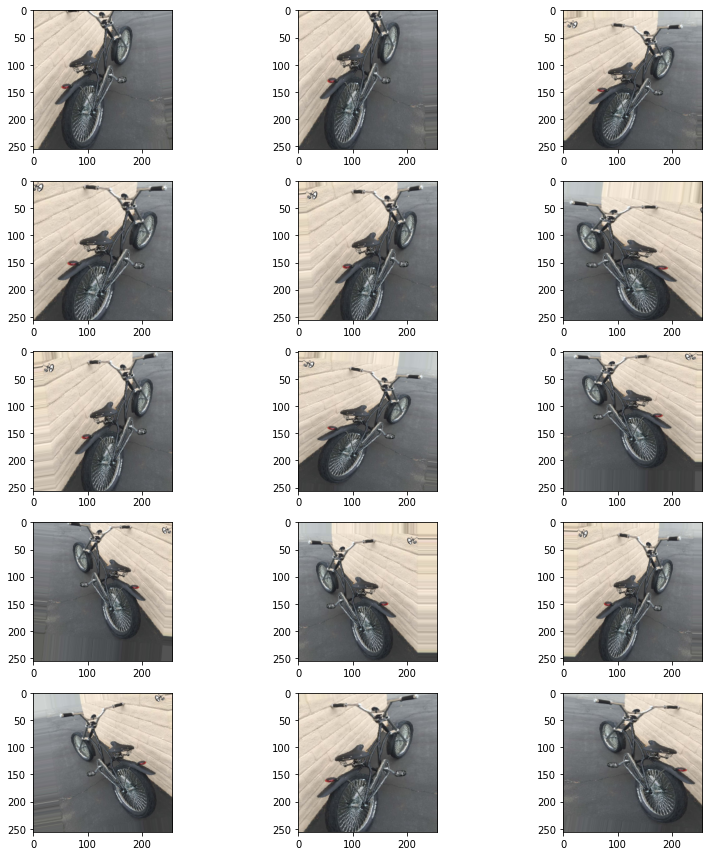

In [84]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [85]:
epochs=3 if FAST_RUN else 40
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/40
35/35 [==============================] - 88s 2s/step - loss: 0.7363 - accuracy: 0.7006 - val_loss: 3.2420 - val_accuracy: 0.4792 - lr: 0.0010
Epoch 2/40
35/35 [==============================] - 89s 3s/step - loss: 0.5594 - accuracy: 0.7667 - val_loss: 4.1032 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 3/40
35/35 [==============================] - 85s 2s/step - loss: 0.4811 - accuracy: 0.7965 - val_loss: 0.5549 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 4/40
35/35 [==============================] - 85s 2s/step - loss: 0.4750 - accuracy: 0.7984 - val_loss: 0.3662 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 5/40
35/35 [==============================] - 87s 2s/step - loss: 0.4535 - accuracy: 0.8121 - val_loss: 0.2345 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 6/40
35/35 [==============================] - 85s 2s/step - loss: 0.4390 - accuracy: 0.8209 - val_loss: 0.4251 - val_accuracy: 0.8292 - lr: 0.0010
Epoch 7/40
35/35 [==============================] - ETA: 0s - loss: 0.4864 - accur

In [96]:
model.save_weights("model.h5")

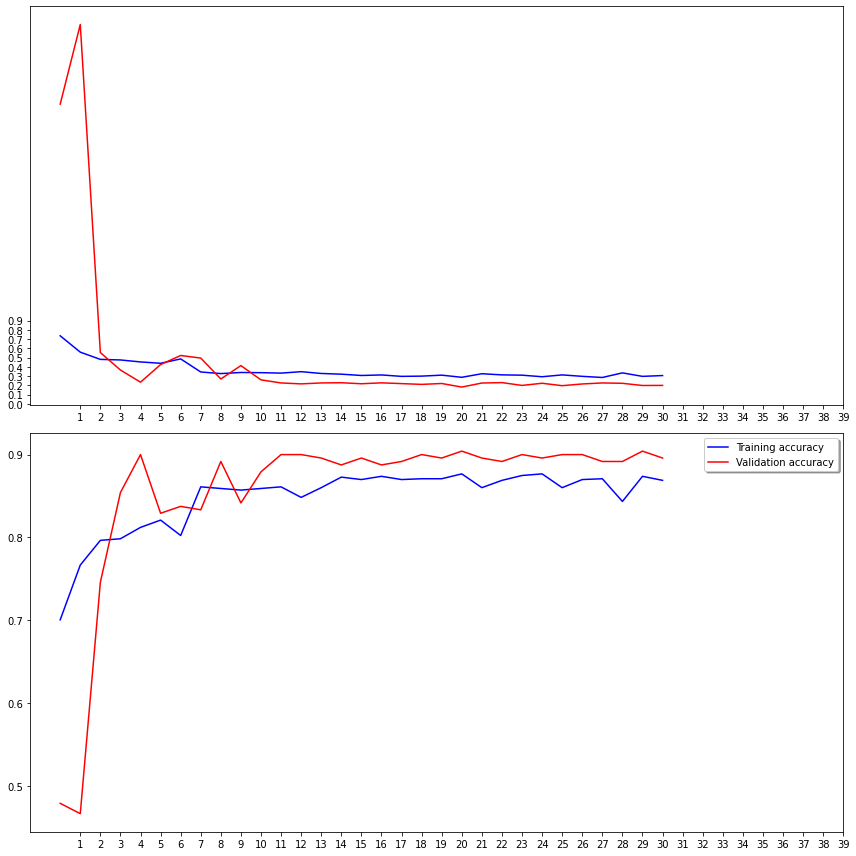

In [87]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show() 

In [88]:
test_filenames = os.listdir("data/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [89]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "data/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=True
)

Found 20 validated image filenames.


In [90]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [91]:
test_df['category'] = np.argmax(predict, axis=-1)

In [92]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [93]:
test_df['category'] = test_df['category'].replace({ 'Mountain': 1, 'Road': 0 })

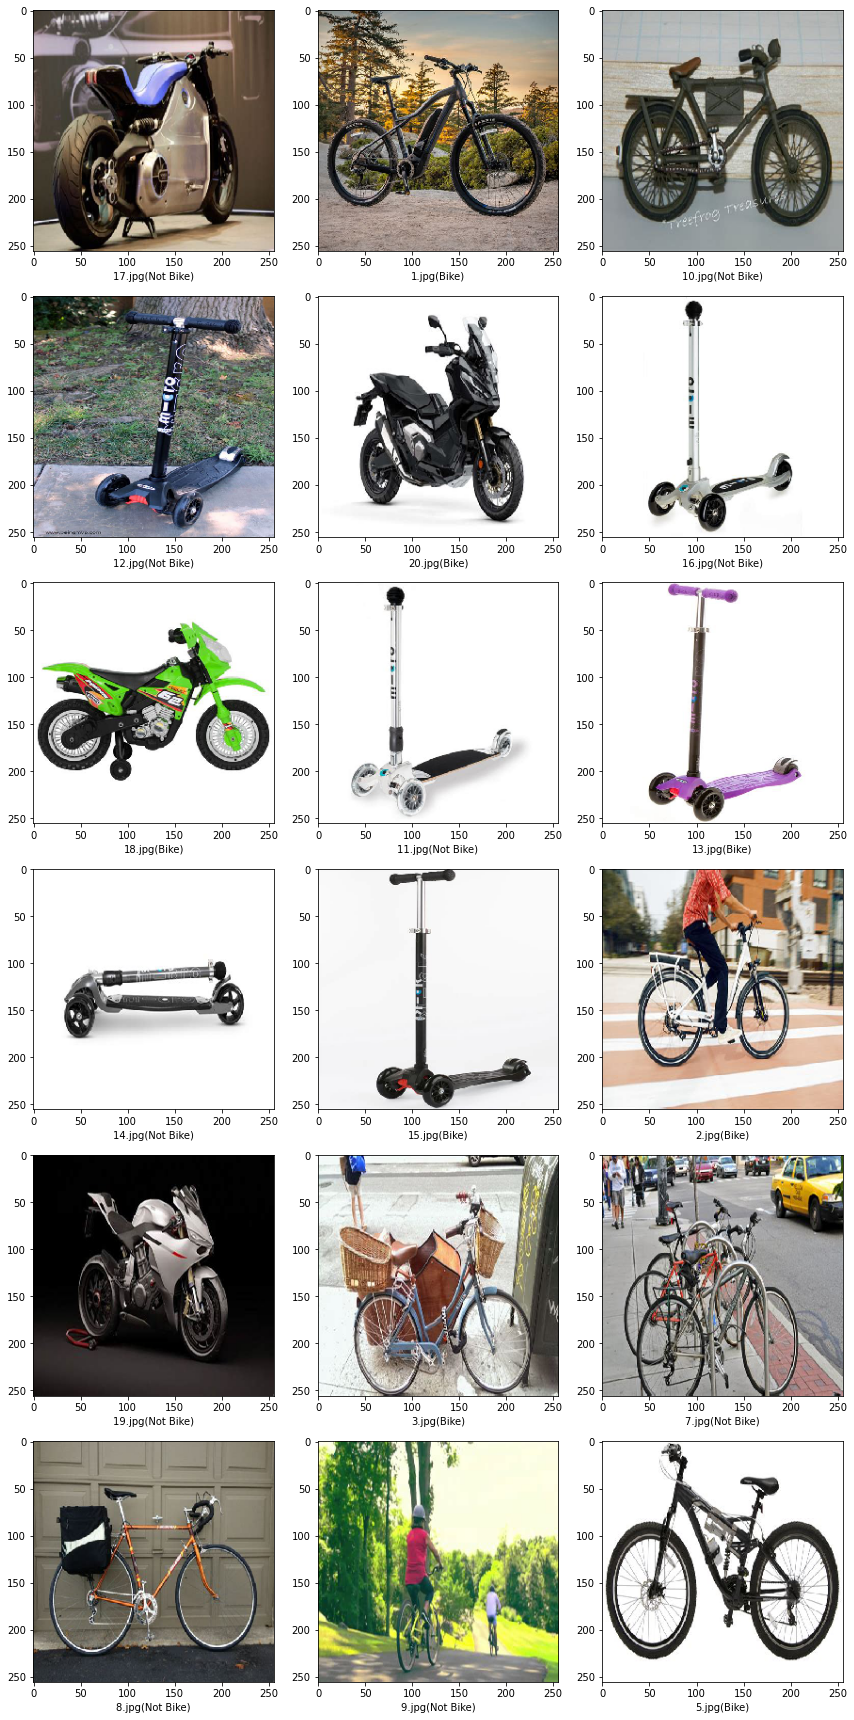

In [94]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = tensorflow.keras.utils.load_img("data/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [95]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)